<a href="https://colab.research.google.com/github/ChinmayK0607/AIprojects/blob/main/ImageGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade --quiet


In [2]:
import opendatasets as od

d_url='https://www.kaggle.com/datasets/splcher/animefacedataset'
od.download(d_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chinmaykarkar
Your Kaggle Key: ··········


100%|██████████| 395M/395M [00:03<00:00, 114MB/s]


In [11]:
DATA_DIR= './animefacedataset'

In [3]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T


In [12]:
img_size=64
batch_size=128
stats=(0.5,0.5,0.5),(0.5,0.5,0.5)


In [16]:
train_ds=ImageFolder(DATA_DIR, transform=T.Compose({
    T.Resize(img_size),
    T.CenterCrop(img_size),
    T.ToTensor(),
    T.Normalize(*stats)
    }))

tain_dl= DataLoader(train_ds,batch_size,shuffle=True,num_workers=2,pin_memory=True)

Denormalisation of the tensors

In [9]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def denormalise(img_t):
    return img_t + stats[1][0] +stats[0][0]

In [20]:
def show_img(images,nmax=64):
    fig,ax=plt.subplots(figsize =(8,8))
    ax.set_xticks([]);ax.set_yticks([]);
    ax.imshow(make_grid(denormalise(images.detach()[:nmax]),nrow=8).permute(1,2,0))

def show_batch(dl,nmax=64):
    for images, _ in dl:
        show_img(images,nmax)
        break

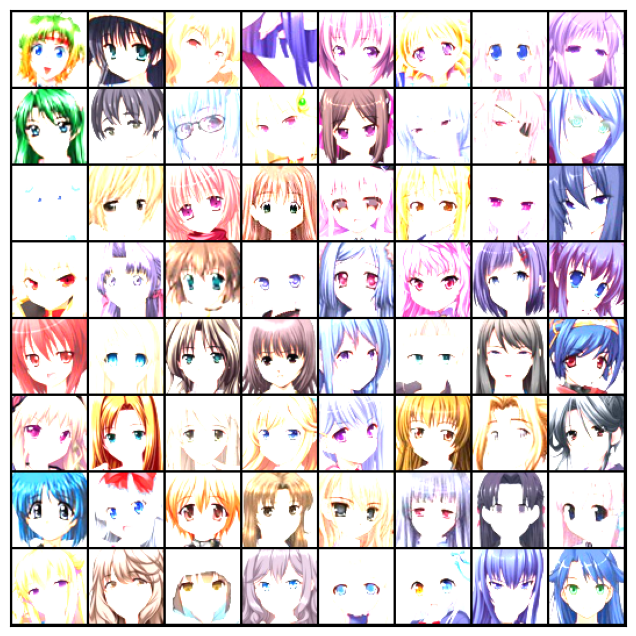

In [21]:
show_batch(tain_dl)

In [22]:
!pip install jovian --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [23]:
import jovian

In [24]:
jovian.commit(project='ML',environment=None)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
